# 1. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)

In [64]:
import pandas as pd
pdAnalysis_df = pd.read_csv('parkinsons.data.csv')
print(pdAnalysis_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

#### Information on data set says there is no any missing values as there are 195 entries and all the columns have 195 non null values with float or int datatype. Dropping the name column as this is object data type.

In [65]:
pd_df = pdAnalysis_df.drop('name', axis=1)

# 2. Using univariate & bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

In [66]:
pd_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [68]:
# there are some outliers in the columns, which will be removed using below capping methods.
numericColNames = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','NHR','HNR','status','RPDE','DFA','spread1','spread2','D2','PPE']

for colname in numericColNames:
    iqr = pd_df[colname].quantile(.75) - pd_df[colname].quantile(.25)
    minCap = pd_df[colname].quantile(.25) - (1.5 * iqr)
    maxCap = pd_df[colname].quantile(.75) + (1.5 * iqr)
    pd_df = pd_df[(pd_df[colname] >= minCap) & (pd_df[colname] <= maxCap)]


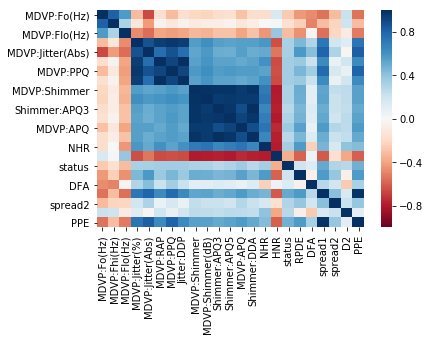

In [50]:

import seaborn as sn
sn.heatmap(pd_df.corr(), vmin=-1, vmax=1, cmap='RdBu')

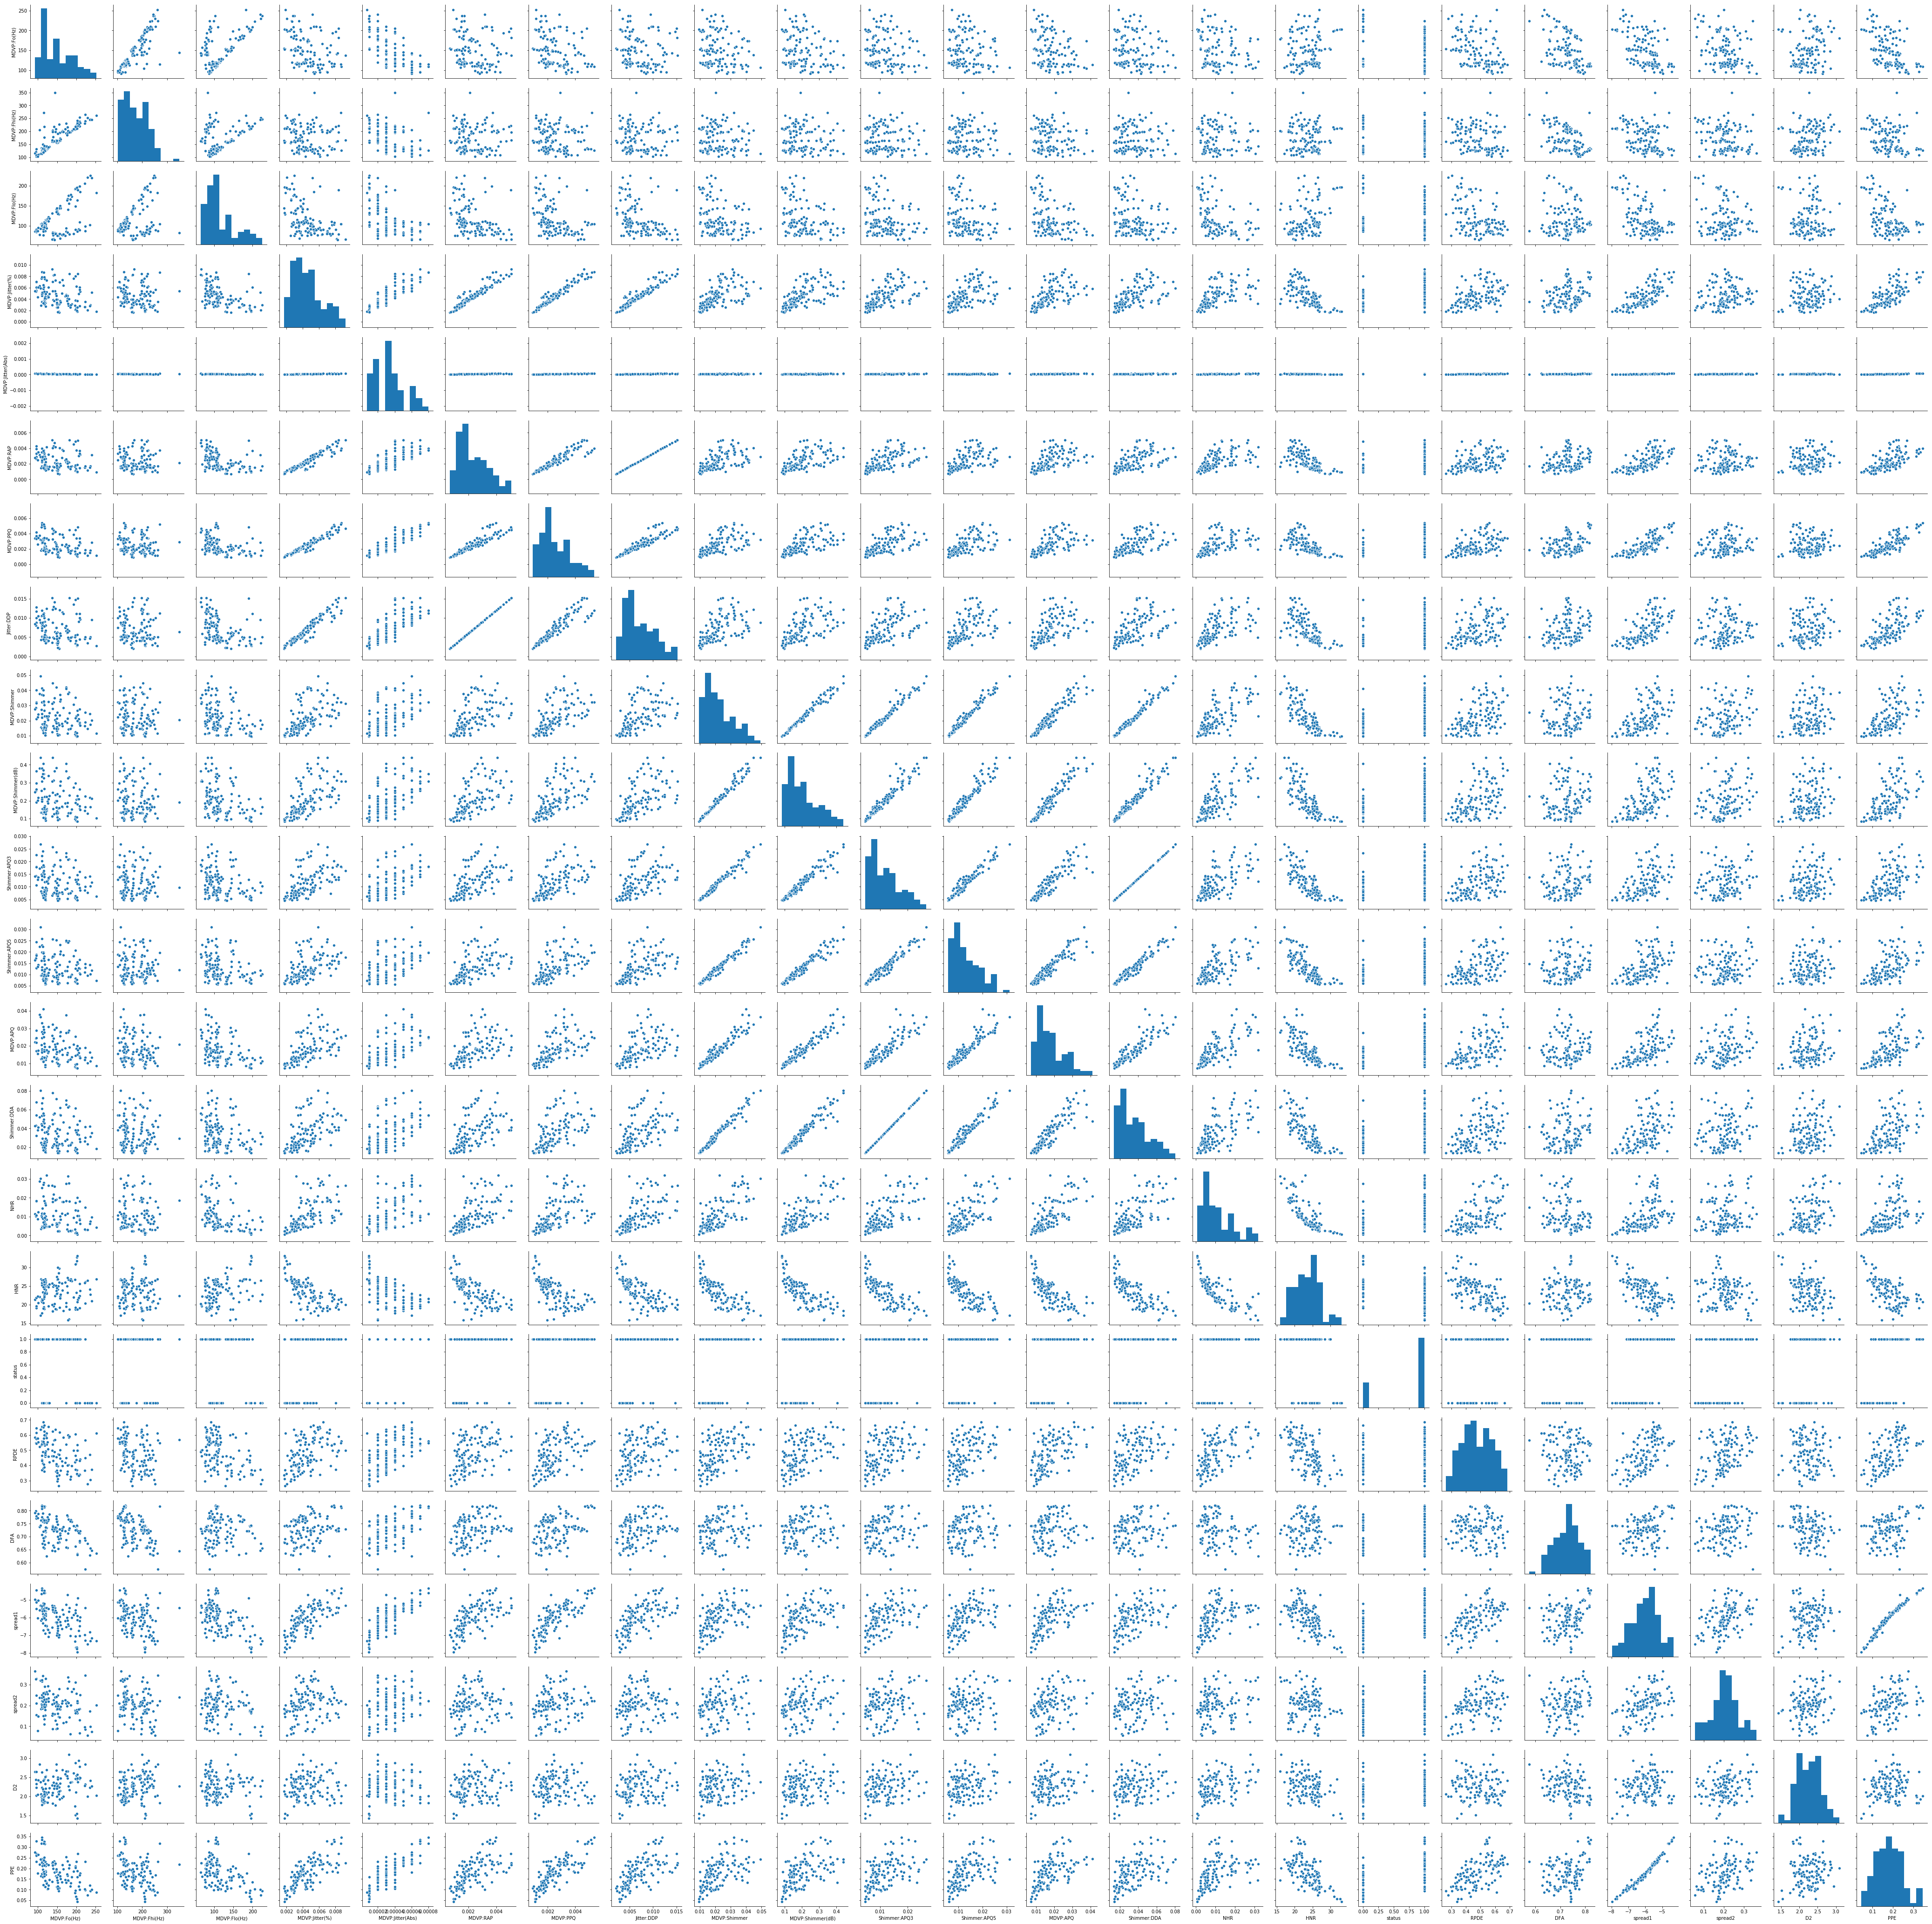

In [51]:
# the above correlation heatmap and below pair map shows that the data like (Several measures of variation in amplitude)
# in dataset are collieaner. The status ie. (Health status of the subject (one) - Parkinson's, (zero) - healthy)
# is less correlated to given measures, especially Shimmer and Jitter measures. we can pick one of the shimmer columns
# rest of the shimmer column can be dropped and check the model how it works.MDVP-Shimmer and MDVP-APQ are much 
# related to status column, so we can use those columns compared to other shimmer columns.
sn.pairplot(pd_df)

In [70]:
pd_df.drop(['Shimmer:APQ3','Shimmer:APQ5','Shimmer:DDA'],axis=1,inplace=True)

# 3.Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [71]:
X = pd_df.drop('status', axis=1)
Y = pd_df['status']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=999099999)
print(x_train.shape, x_test.shape, X.shape, pd_df.shape)
# The shape is changed, this is due to the removal outliers.

(87, 19) (38, 19) (125, 19) (125, 20)


# 4.Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [72]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 98989898)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=98989898, splitter='best')

# 5.Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

In [73]:
print('Decision tree accuracy score is {0}'.format(dt_model.score(x_test , y_test)))
test_pred = dt_model.predict(x_test)
print(y_test.shape, test_pred.shape)

Decision tree accuracy score is 0.9473684210526315
(38,) (38,)


In [74]:
pd.crosstab(pdAnalysis_df.name, [y_test, test_pred])

status          0     1   
col_1           0  1  0  1
name                      
phon_R01_S02_3  0  0  1  0
phon_R01_S04_5  0  0  0  1
phon_R01_S05_6  0  0  0  1
phon_R01_S06_2  0  0  0  1
phon_R01_S07_2  1  0  0  0
phon_R01_S07_6  0  1  0  0
phon_R01_S08_5  0  0  0  1
phon_R01_S13_1  0  1  0  0
phon_R01_S13_3  0  1  0  0
phon_R01_S13_4  0  1  0  0
phon_R01_S16_5  0  0  0  1
phon_R01_S17_5  0  1  0  0
phon_R01_S18_1  0  0  0  1
phon_R01_S19_3  0  0  1  0
phon_R01_S20_5  0  0  0  1
phon_R01_S21_3  0  0  0  1
phon_R01_S22_4  0  0  0  1
phon_R01_S22_5  0  0  1  0
phon_R01_S25_1  0  0  1  0
phon_R01_S25_2  0  0  0  1
phon_R01_S26_1  0  0  0  1
phon_R01_S26_3  0  0  1  0
phon_R01_S31_1  0  0  1  0
phon_R01_S31_4  0  0  1  0
phon_R01_S31_6  0  0  0  1
phon_R01_S32_5  0  0  0  1
phon_R01_S32_6  0  0  0  1
phon_R01_S33_2  0  0  0  1
phon_R01_S33_6  0  0  1  0
phon_R01_S34_6  0  0  0  1
phon_R01_S39_1  0  0  0  1
phon_R01_S39_2  0  0  0  1
phon_R01_S42_1  0  1  0  0
phon_R01_S42_5  1  0  0  0
phon_R01_S43_3  0  1  0  0
phon_R01_S43_6  0  1  0  0
phon_R01_S44_1  0  0  0  1
phon_R01_S49_2  1  0  0  0

# 6.Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 


In [75]:

dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth=4,min_samples_leaf=10,
                                  min_weight_fraction_leaf=0.1,
                                  random_state = 9898)
dt_model.fit(x_train, y_train)
print('Decision tree accuracy score on train dataset is {0}'.format(dt_model.score(x_train , y_train)))
print('Decision tree accuracy score on test dataset is {0}'.format(dt_model.score(x_test , y_test)))
test_pred = dt_model.predict(x_test)
print(y_test.shape, test_pred.shape)


#By regularization, the overfitting can be avoided, moreover, model accuracy can be achieved with consistent 
#result of higher accuracy on test dataset compared to train dataset which ensures training the model 
#without overfitting


#updating the parameters helps to ensure the homogeneity of the tree considered within the max depth and 
#minimum sample leaf.


Decision tree accuracy score on train dataset is 0.8620689655172413
Decision tree accuracy score on test dataset is 0.8947368421052632
(38,) (38,)


In [76]:
import pydot
from IPython.display import Image
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz

In [77]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

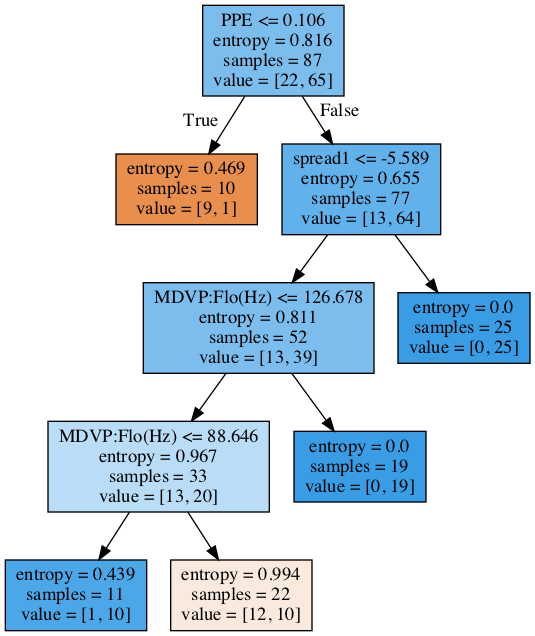

In [78]:
graph2, = print_tree(dt_model, features=x_train.columns)
Image(graph2.create_png())

# 7.Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points) 



In [79]:

from sklearn.ensemble import RandomForestClassifier

In [80]:

rf_model = RandomForestClassifier(n_estimators=16,max_depth=3
                                  ,random_state=989898989)
rf_model.fit(x_train, y_train)
print('Accuracy score for train data set to check overfitting is {0}'.format(rf_model.score(x_train,y_train)))
print('Accuracy score for test data set is {0}'.format(rf_model.score(x_test,y_test)))

# Without overfitting, estimators with 16 and max depth with 3 gives optimal accuracy score

Accuracy score for train data set to check overfitting is 0.9310344827586207
Accuracy score for test data set is 0.9473684210526315
